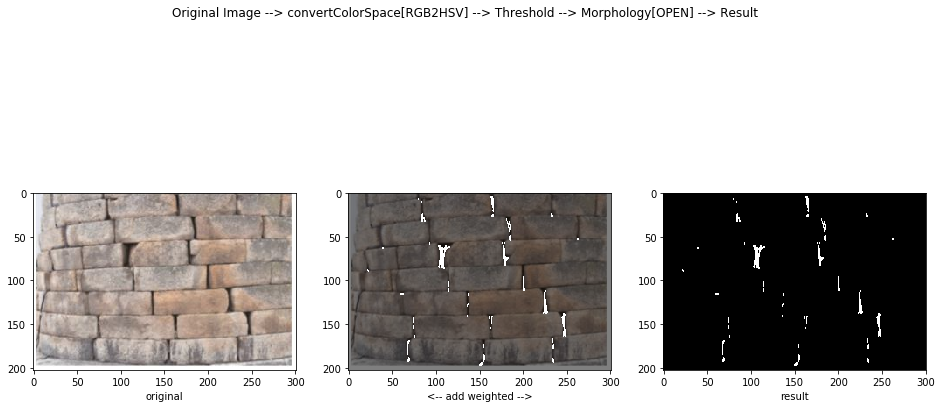

In [63]:
import numpy as np
import cv2

# --------------------------------

def model(src, sequence):
    retval = src
    for proc in sequence:
        retval = proc(retval)
    return retval

# --------------------------------

def readFile(path):
    return cv2.imread(path)

def convertColorSpace(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

def threshold(frame):
    # HSV 색공간을 이용. 채도와 밝기가 낮은 곳을 선택함. (==그림자)
    range_lower = (  0,  0,  0)
    range_upper = (255, 96, 92)
    return cv2.inRange(frame, range_lower, range_upper)

def morphology(frame):
    frame = cv2.morphologyEx(frame, cv2.MORPH_CLOSE, (5,5))
    return cv2.morphologyEx(frame, cv2.MORPH_OPEN, (5,5))

# --------------------------------

filepath = './res/partial_01.JPG'
# filepath = './res/partial_p_01.JPG'
# filepath = './res/total_01.JPG'

sequence = [
    readFile,
    convertColorSpace,
    threshold,
    morphology
]

result = model(filepath, sequence)

original = readFile(filepath)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize=(16,8))
fig.suptitle('Original Image --> convertColorSpace[RGB2HSV] --> Threshold --> Morphology[OPEN] --> Result')

# Plot 0
axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axs[0].set_xlabel('original')

# Plot 1
axs[1].imshow(cv2.cvtColor(cv2.add(original//2, cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)), cv2.COLOR_BGR2RGB))
axs[1].set_xlabel('<-- add weighted -->')

# Plot 2
axs[2].imshow(result, cmap='gray')
axs[2].set_xlabel('result')

plt.show()

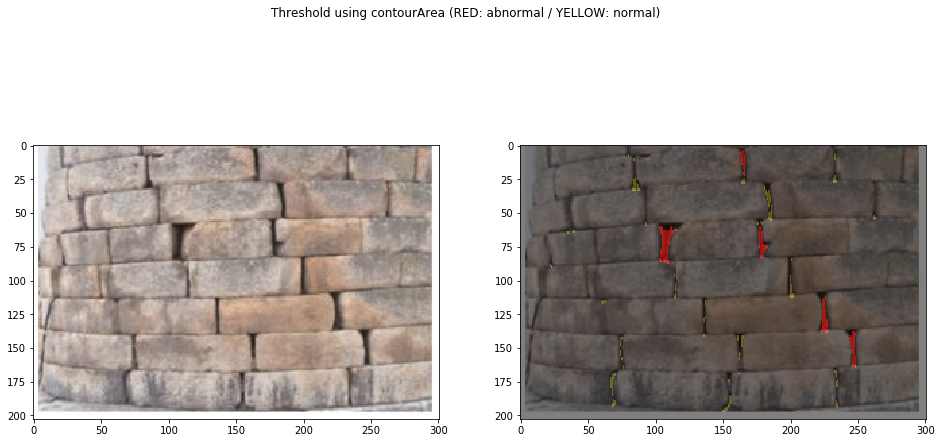

In [64]:
# 위 코드에 이어서...

MIN_CONT_AREA = 20

# 윤곽선 면적에도 임계를 주어 훼손여부를 가림.
mask = np.zeros(original.shape, dtype=np.uint8)
contours = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
for cont in contours:
    if cv2.contourArea(cont) >= MIN_CONT_AREA:
        cv2.drawContours(mask, [cont], -1, (0,0,255), -1)
    else:
        cv2.drawContours(mask, [cont], -1, (0,128,128), -1)
result2 = cv2.cvtColor(cv2.add(original//2, mask//2), cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2, figsize=(16,8))
fig.suptitle('Threshold using contourArea (RED: abnormal / YELLOW: normal)')

axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axs[1].imshow(result2)

plt.show()